In [2]:
import scanpy as sc
import pandas as pd

[Executed on 2023-11-24 09:45:16.578917]


In [3]:
adata=sc.read_h5ad("/proj/sensoryaging/60_plates_data/Human_data/data_process/Dataprocess.h5ad")
adata

[Executed on 2023-11-22 12:26:08.947978]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 3840 × 60220

In [4]:
readcounts = sc.read_text("/proj/sensoryaging/60_plates_data/Human_data/convert/readcount_inex_all.csv",first_column_names=True,delimiter=",")
adata.layers["read"] = readcounts.X


[Executed on 2023-11-22 12:26:26.109860]


In [6]:
adata.var_names_make_unique()
adata.layers["umi"] = adata.X.copy() # save the UMI counts in a new layer

[Executed on 2023-11-22 12:27:29.091615]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/anndata/utils.py:260: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD115-1', 'SNORD115-2', 'SNORD115-3', 'SNORD115-4', 'SNORD115-5']
  warnings.warn(


In [7]:
adata

[Executed on 2023-11-22 12:27:37.680742]


AnnData object with n_obs × n_vars = 3840 × 60220
    layers: 'read', 'umi'

In [8]:
adata.var_names 

[Executed on 2023-11-22 12:29:05.950295]


Index(['TSPAN6', 'TNMD', 'DPM1', 'SCYL3', 'C1orf112', 'FGR', 'CFH', 'FUCA2',
       'GCLC', 'NFYA',
       ...
       'rRNA_rnacentral_74', 'rRNA_rnacentral_78', 'rRNA_rnacentral_79',
       'rRNA_rnacentral_83', 'rRNA_rnacentral_85', 'rRNA_rnacentral_87',
       'rRNA_rnacentral_88', 'rRNA_rnacentral_89', 'rRNA_rnacentral_95',
       'rRNA_rnacentral_96'],
      dtype='object', length=60220)

[Executed on 2023-11-22 12:29:28.118859]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

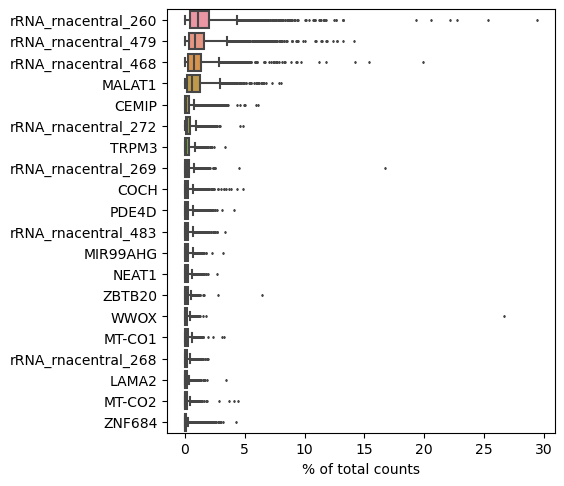

In [9]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [10]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

[Executed on 2023-11-22 12:29:55.455331]


In [13]:
adata.X = adata.layers['umi'] # restore the UMI counts before normalization

[Executed on 2023-11-22 12:31:20.962797]


In [22]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, layer='read',inplace=False)

[Executed on 2023-11-22 12:43:14.186357]


(                      n_genes_by_counts  total_counts  total_counts_mt  \
 AACATCGAGGAACTAGCGAT              10803      544523.0            483.0   
 AACATCGAGGAATCAGCGTA              13202      354420.0            869.0   
 AACATCGAGGACAGCCAGAT               6982       37391.0             15.0   
 AACATCGAGGACTGTCGACG              11335      566374.0            467.0   
 AACATCGAGGATCGCTAGAA              13991      279908.0            138.0   
 ...                                 ...           ...              ...   
 TTGTTACTCGTCTAGAAGAG               5446       28099.0            176.0   
 TTGTTACTCGTGCTGATGCG              10310      373114.0            258.0   
 TTGTTACTCGTGTATCTCCT              10000      290017.0            614.0   
 TTGTTACTCGTTCGAGTTGT               6469       65388.0             47.0   
 TTGTTACTCGTTCTAAGCCA               4077       17588.0             39.0   
 
                       pct_counts_mt  
 AACATCGAGGAACTAGCGAT       0.088701  
 AACATCGAGGAATCAGCGT

[Executed on 2023-11-22 12:43:16.481362]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

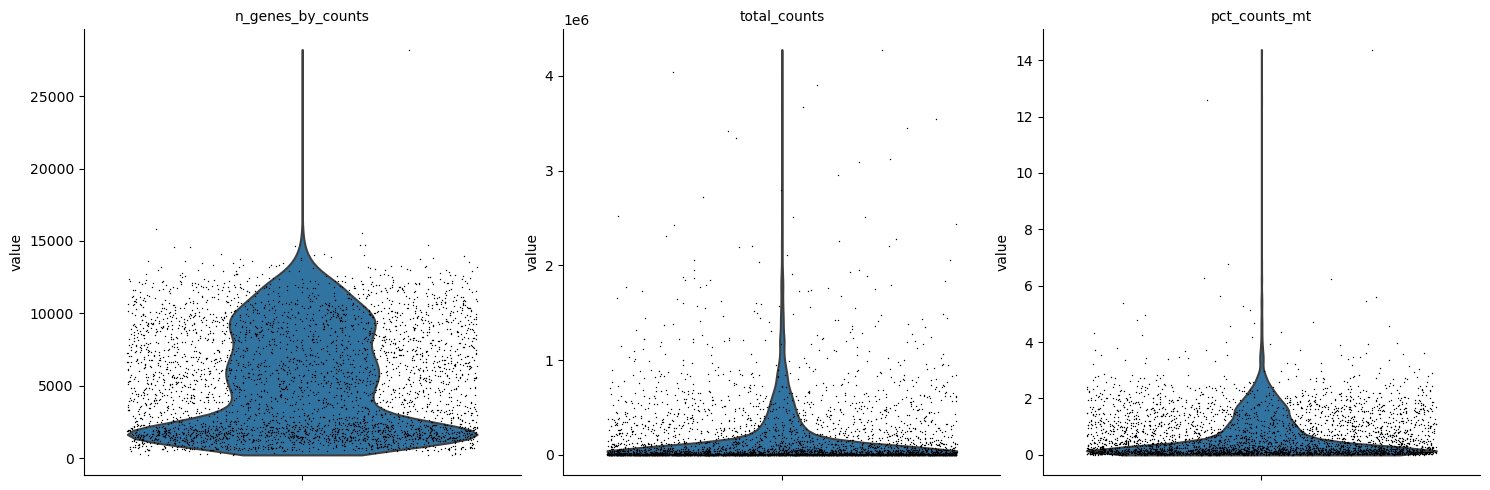

In [23]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [19]:
adata.var

[Executed on 2023-11-22 12:41:26.457714]


,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
TSPAN6,849,False,849,3.075600,77.867570,11798.0
TNMD,140,False,140,0.188999,96.350365,725.0
DPM1,1007,False,1007,5.819864,73.748697,22325.0
SCYL3,930,False,930,5.094891,75.755996,19544.0
C1orf112,1328,False,1328,4.824296,65.380605,18506.0
...,...,...,...,...,...,...
rRNA_rnacentral_87,6,False,6,0.004953,99.843587,19.0
rRNA_rnacentral_88,228,False,228,0.099322,94.056309,381.0
rRNA_rnacentral_89,718,False,718,0.862878,81.282586,3310.0
rRNA_rnacentral_95,10,False,10,0.012252,99.739312,47.0


In [24]:
adata.write_h5ad("/proj/sensoryaging/60_plates_data/Human_data/data_process/Dataprocess.h5ad")

[Executed on 2023-11-22 13:17:04.500521]


In [3]:
adata=sc.read_h5ad("/proj/sensoryaging/60_plates_data/Human_data/data_process/Dataprocess.h5ad")
adata

[Executed on 2023-11-24 09:45:57.194444]


AnnData object with n_obs × n_vars = 3836 × 58198
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    layers: 'read', 'umi'

[Executed on 2023-11-24 09:46:00.597784]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

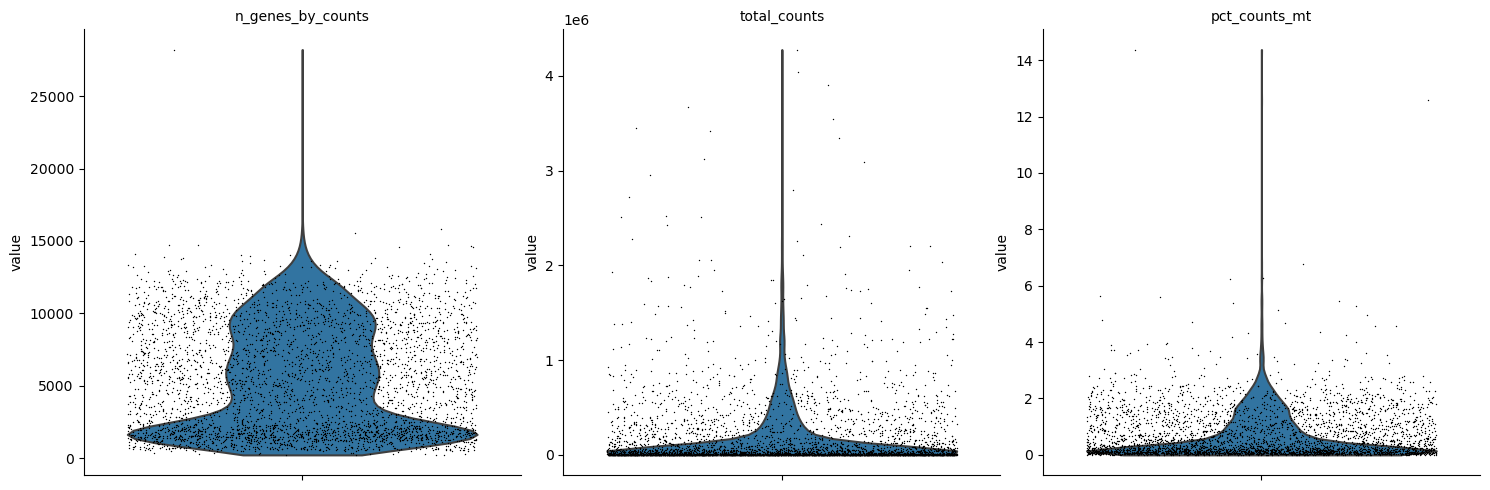

In [4]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

[Executed on 2023-11-24 09:46:02.490422]


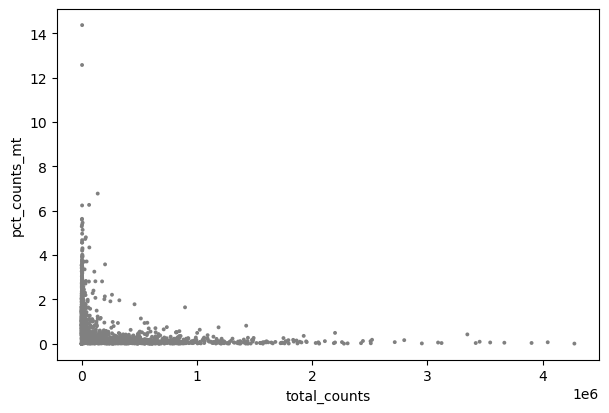

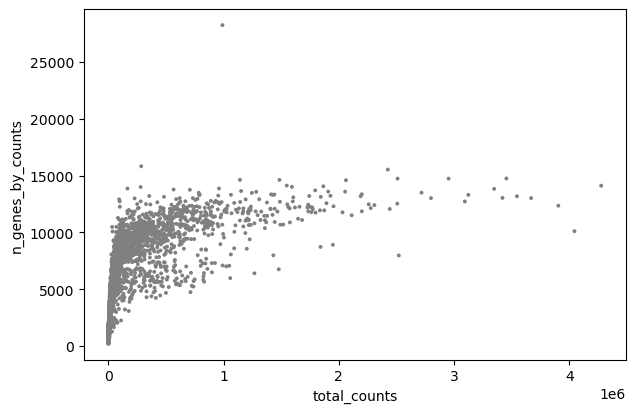

In [5]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [6]:
adata

[Executed on 2023-11-24 09:46:05.190273]


AnnData object with n_obs × n_vars = 3836 × 58198
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    layers: 'read', 'umi'

[Executed on 2023-11-24 09:48:42.725605]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

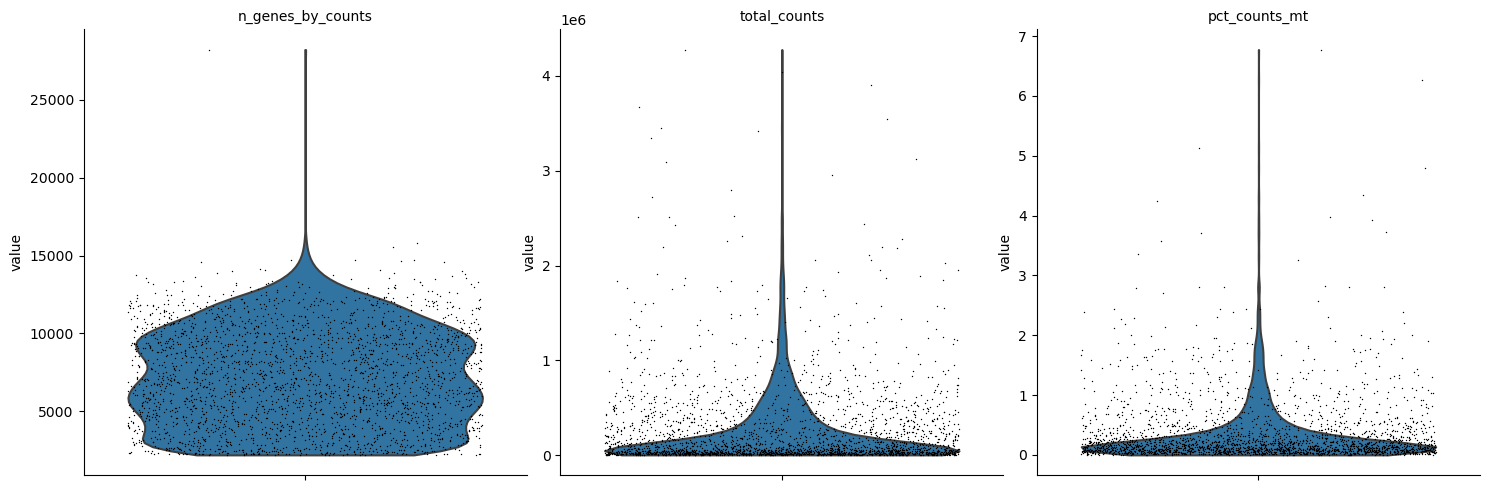

In [16]:
a=adata[adata.obs['n_genes_by_counts'] > 2200, :]
sc.pl.violin(a, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [18]:
a=a[a.obs.pct_counts_mt < 2, :]

[Executed on 2023-11-24 09:49:39.555103]


In [19]:
a

[Executed on 2023-11-24 09:49:43.282517]


View of AnnData object with n_obs × n_vars = 2581 × 58198
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    layers: 'read', 'umi'

[Executed on 2023-11-24 11:06:57.786804]


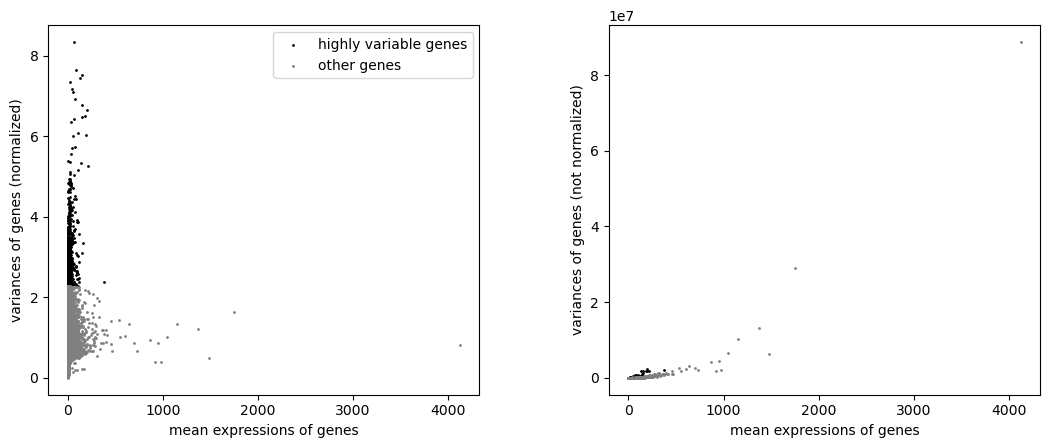

In [33]:
sc.pp.highly_variable_genes(a,n_top_genes=1500, flavor='seurat_v3', layer='umi')
sc.pl.highly_variable_genes(a)

In [23]:
sc.pp.normalize_total(a, target_sum=1e4)
sc.pp.log1p(a)
a.layers['log1p'] = a.X.copy()
sc.pp.scale(a, max_value=10)
a.layers['scale'] = a.X.copy()
a.X=a.layers['umi'].copy()

[Executed on 2023-11-24 09:53:44.409383]


[Executed on 2023-11-24 11:07:08.861059]


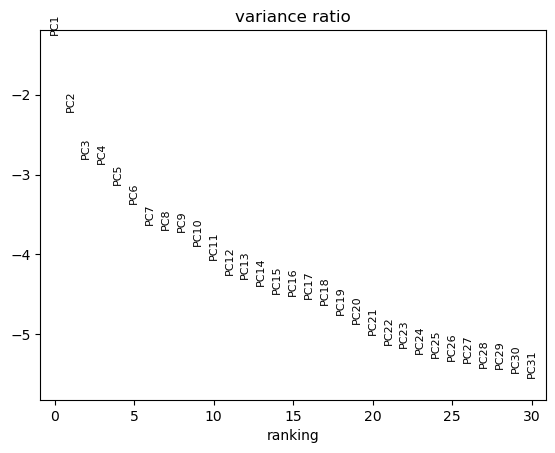

In [34]:
sc.tl.pca(a, svd_solver='arpack')
sc.pl.pca_variance_ratio(a, log=True)

[Executed on 2023-11-24 11:26:25.906501]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


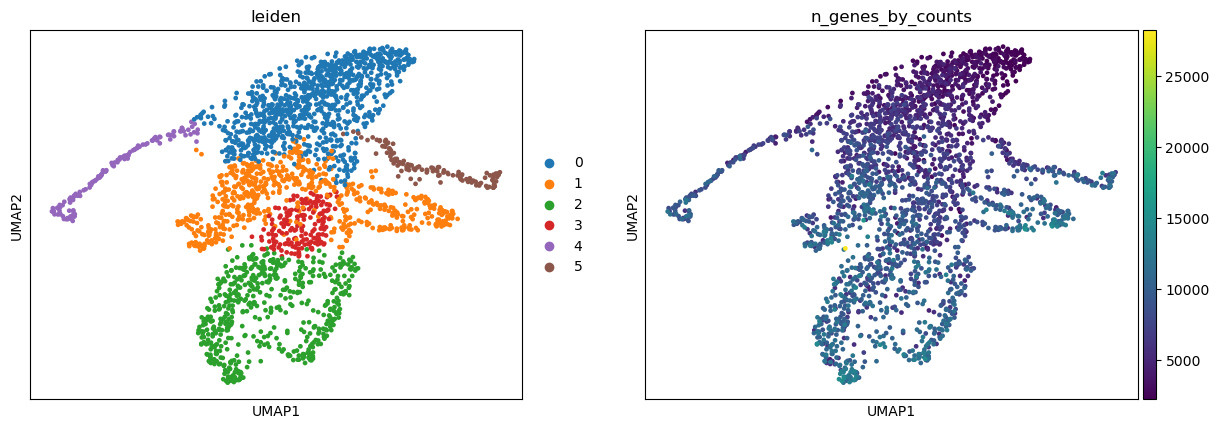

In [40]:
sc.pp.neighbors(a, n_neighbors=50, n_pcs=10)
sc.tl.leiden(a, resolution=0.2)
sc.tl.umap(a, min_dist=0.6, spread=0.77)
sc.pl.umap(a, color=['leiden','n_genes_by_counts'])


In [43]:
adata

[Executed on 2023-11-24 11:47:09.469050]


AnnData object with n_obs × n_vars = 3836 × 58198
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    layers: 'read', 'umi'

In [57]:
a.var

[Executed on 2023-11-24 11:56:02.469007]


,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,highly_variable,highly_variable_rank,means,variances,variances_norm,mean,std
TSPAN6,849,False,849,3.075600,77.867570,11798.0,False,NaN,4.418442,698.718636,0.866350,0.110282,0.305626
TNMD,140,False,140,0.188999,96.350365,725.0,False,NaN,0.268888,3.933873,0.370797,0.020119,0.140477
DPM1,1007,False,1007,5.819864,73.748697,22325.0,False,NaN,8.584657,1439.556881,0.698800,0.165745,0.344762
SCYL3,930,False,930,5.094891,75.755996,19544.0,False,NaN,7.450988,878.572500,0.519201,0.158464,0.334304
C1orf112,1328,False,1328,4.824296,65.380605,18506.0,False,NaN,7.057730,756.285426,0.482454,0.229777,0.421299
...,...,...,...,...,...,...,...,...,...,...,...,...,...
rRNA_rnacentral_87,6,False,6,0.004953,99.843587,19.0,False,NaN,0.005037,0.019742,1.128266,0.000214,0.007415
rRNA_rnacentral_88,228,False,228,0.099322,94.056309,381.0,False,NaN,0.134057,0.740161,0.204507,0.014337,0.090423
rRNA_rnacentral_89,718,False,718,0.862878,81.282586,3310.0,False,NaN,1.175901,23.624861,0.236752,0.065667,0.204949
rRNA_rnacentral_95,10,False,10,0.012252,99.739312,47.0,False,NaN,0.018210,0.271374,1.249411,0.000533,0.013341


In [58]:
#show genes that start with Slc17
adata.var_names.str.startswith('MYO7A')

[Executed on 2023-11-24 11:56:11.938862]


array([False, False, False, ..., False, False, False])

In [ ]:
a

[Executed on 2023-11-24 11:57:42.646710]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


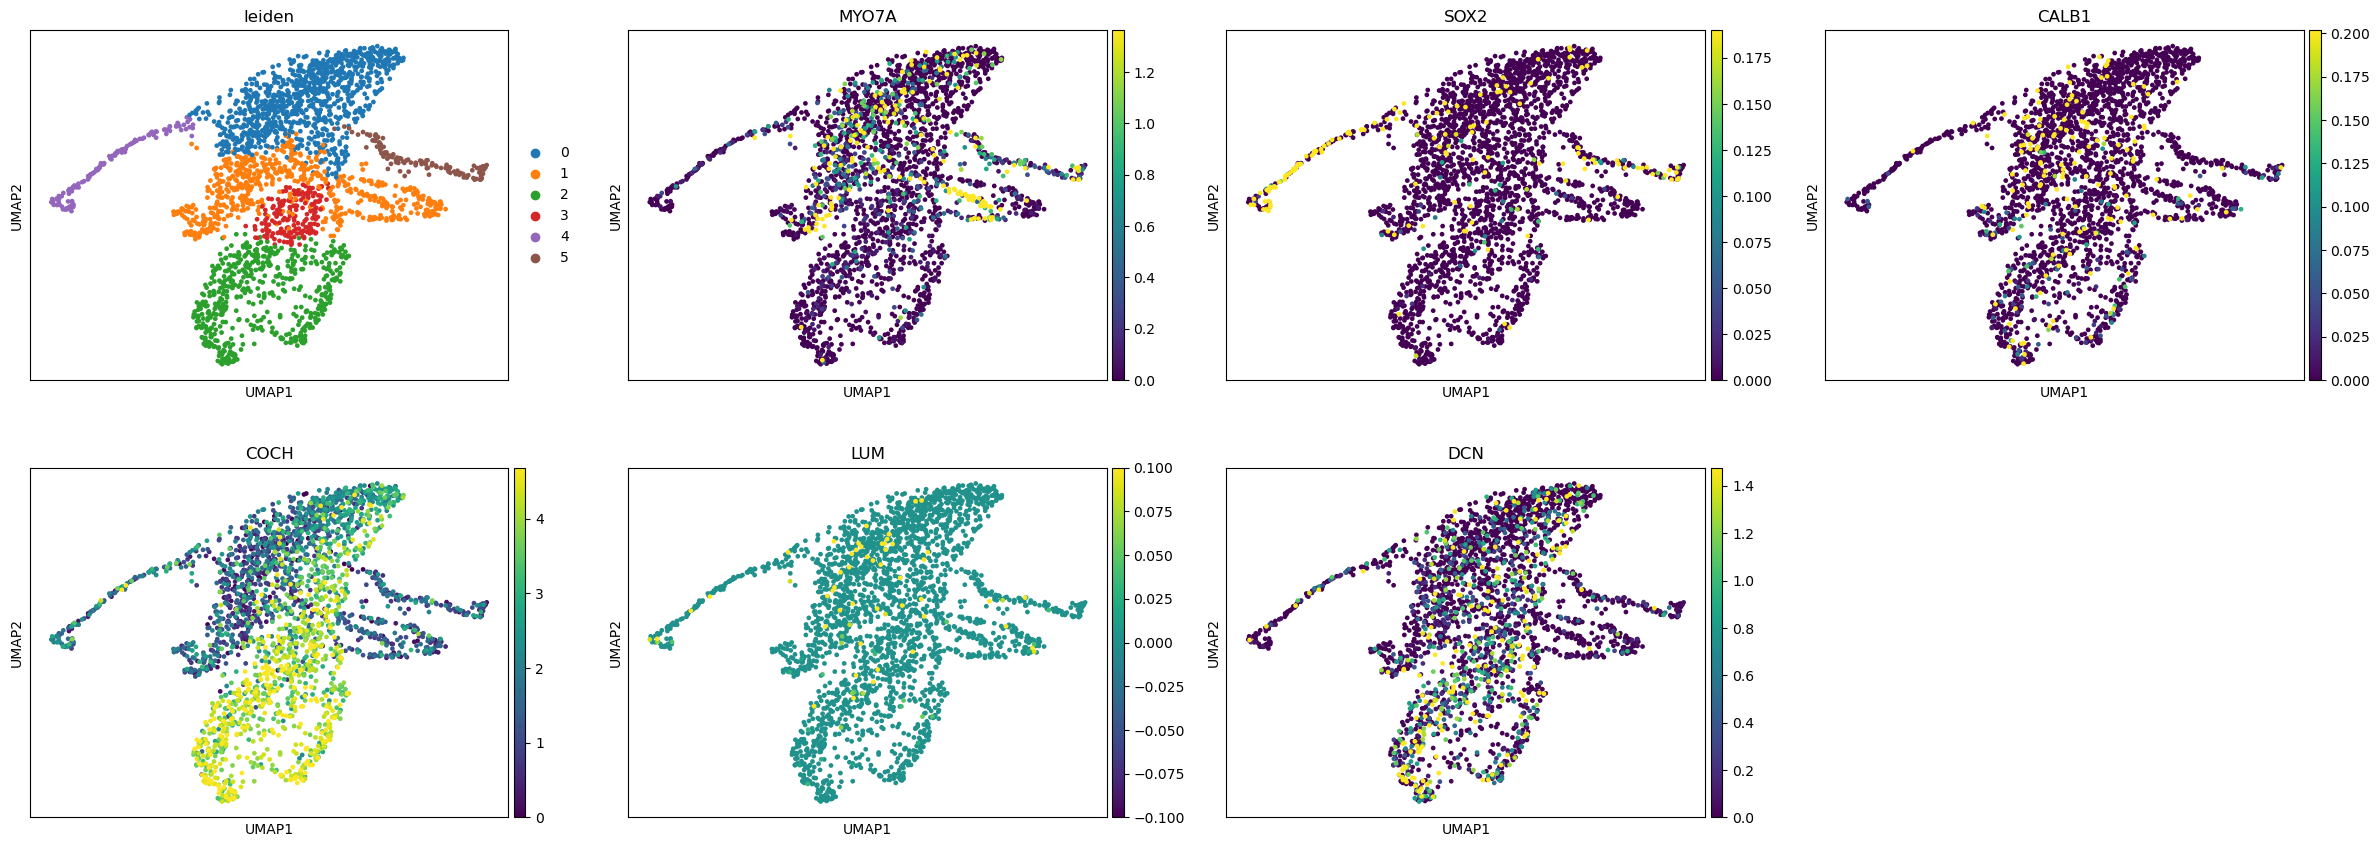

In [63]:
sc.pl.umap(a,color=['leiden','MYO7A','SOX2','CALB1','COCH','LUM','DCN'],layer='log1p',vmax='p95')

[Executed on 2023-11-24 11:52:55.944993]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


KeyError: 'Could not find key Myo7a in .var_names or .obs.columns.'

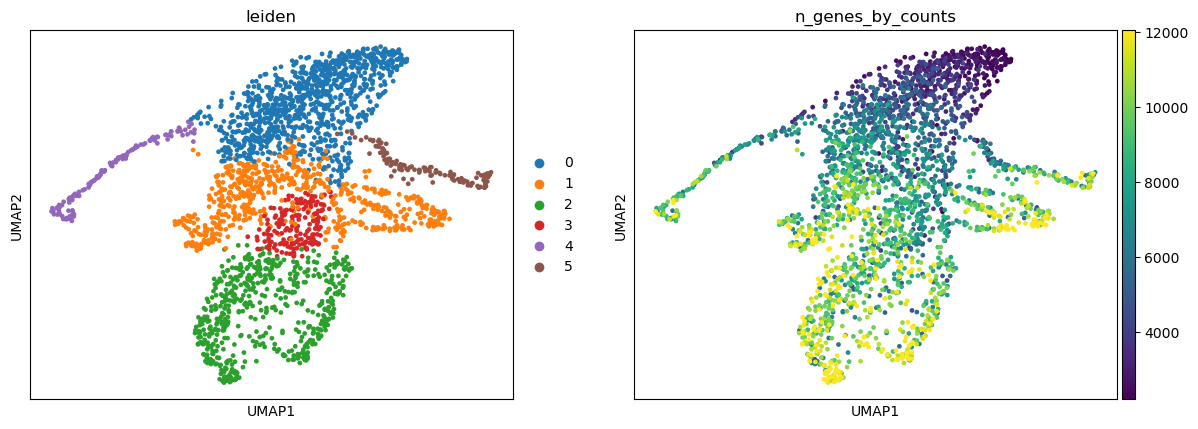

In [44]:
sc.pl.umap(a, color=['leiden','n_genes_by_counts','Myo7a'],layer='log1p',vmax='p95')

In [29]:
a.write_h5ad("/proj/sensoryaging/60_plates_data/Human_data/data_process/First_UMAP.h5ad")

[Executed on 2023-11-24 09:57:40.598875]
